### Capstone Project
#### Title
Assessing the attractiveness of opening an Italian restaurant in India
#### Problem Statement
The year is 2021, the year after the deadly pandemic that brought the world to a standstill. The pandemic had made every business across the world to rethink their strategy in terms of their expansion plans and market entry. It was the similar story at Pasta Tales Inc., a leading chain of Italian cuisine restaurants based out of the United Kingdom. In early 2020, the top management had decided to enter the Indian market and wanted to open at least 3 restaurants across the country. The company had decided all the locations and as they were about to roll-out the plan to enter the market, the pandemic hit the world. Because of the pandemic, the board of directors at Pasta Tales Inc. decided to revisit their Indian market entry strategy and had asked the COO to come up with an analysis of relevant data points to back their decision of entering the Indian market with 3 restaurants.

#### Import relevant Modules

In [1]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

#### Read in data and Convert the data types

In [2]:
url = 'zomato_restaurants_in_India.csv'
df_list = pd.read_csv(url)
df_list.astype({'aggregate_rating': 'float'})
df_list.astype({'average_cost_for_two': 'float'})

res_id                            name      establishment      city  \
0        3400299                     Bikanervala    ['Quick Bites']      Agra   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']      Agra   
2        3401013                   Bhagat Halwai    ['Quick Bites']      Agra   
3        3400290                   Bhagat Halwai    ['Quick Bites']      Agra   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']      Agra   
...          ...                             ...                ...       ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']  Vadodara   
211940   3200996                      Raju Omlet    ['Quick Bites']  Vadodara   
211941  18984164                The Grand Thakar  ['Casual Dining']  Vadodara   
211942   3201138                          Subway    ['Quick Bites']  Vadodara   
211943  18879846     Freshco's - The Health Cafe           ['Café']  Vadodara   

        city_id     locality   latitude  longitude  \
0            34     Khandari  27.211450  78.002381   
1            34   Agra Cantt  27.160569  78.011583   
2            34     Shahganj  27.182938  77.979684   
3            34  Civil Lines  27.205668  78.004799   
4            34      Tajganj  27.157709  78.052421   
...         ...          ...        ...        ...   
211939       32    Fatehgunj  22.336931  73.192356   
211940       32   Karelibaug  22.322455  73.197203   
211941       32     Alkapuri  22.310563  73.171164   
211942       32        Akota  22.270027  73.143068   
211943       32     Vadiwadi  22.309935  73.158768   

                                                 cuisines  \
0       North Indian, South Indian, Mithai, Street Foo...   
1       North Indian, Mughlai, Rolls, Chinese, Fast Fo...   
2                                       Fast Food, Mithai   
3               Desserts, Bakery, Fast Food, South Indian   
4                      North Indian, Continental, Italian   
...                                                   ...   
211939                                       North Indian   
211940                                          Fast Food   
211941                    Gujarati, North Indian, Chinese   
211942                         Fast Food, Sandwich, Salad   
211943                         Cafe, Healthy Food, Coffee   

        average_cost_for_two  price_range  \
0                      700.0            2   
1                      600.0            2   
2                      300.0            1   
3                      300.0            1   
4                     1000.0            3   
...                      ...          ...   
211939                 600.0            2   
211940                 300.0            1   
211941                 700.0            2   
211942                 500.0            2   
211943                 600.0            2   

                                               highlights  aggregate_rating  \
0       ['Lunch', 'Takeaway Available', 'Credit Card',...               4.4   
1       ['Delivery', 'No Alcohol Available', 'Dinner',...               4.4   
2       ['No Alcohol Available', 'Dinner', 'Takeaway A...               4.2   
3       ['Takeaway Available', 'Credit Card', 'Lunch',...               4.3   
4       ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...               4.9   
...                                                   ...               ...   
211939  ['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...               4.1   
211940  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...               4.1   
211941  ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...               4.0   
211942  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...               3.7   
211943  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...               4.0   

       rating_text  votes  delivery  takeaway  
0        Very Good    814        -1        -1  
1        Very Good   1203        -1        -1  
2        Very Good   

Collect the list of cities in the data frame

In [3]:
df_city=df_list[['city']]
cns=df_city['city'].to_list()
fl_city=sorted(list(set(cns)))
del df_city

Collect list of cuisines in the data frame

In [4]:
cns=[]
df_cuisine=df_list[['cuisines']]
new = pd.DataFrame(df_cuisine["cuisines"].str.split(",", expand = True))
for i in range(8):
    cns.append(list(new[i].unique()))
flat_list = [item for sublist in cns for item in sublist]
ncns=[]
for i in list(flat_list):
    if type(i)==str and i!='nan':
        ncns.append(i.strip())
fl_cuisine=sorted(list(set(ncns)))
del df_cuisine

Take only relevant data for analysis and drop rows with empty fields

In [5]:
df=df_list[['city_id','name', 'city','latitude','longitude','cuisines','average_cost_for_two','aggregate_rating','highlights','rating_text']]
df.dropna(inplace=True)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Distribution of restaurants across India

In [6]:

df_ll=pd.DataFrame(df.groupby(['city']).agg({'latitude': 'mean','longitude':'mean'}).reset_index())  
df_c=pd.DataFrame(df.groupby('city')['city'].value_counts())


venues_map = folium.Map(location=[22.35538,77.262646], zoom_start=5) 
mres=df_c['city'].mean()
for ct, lat, lng, cnt in zip(df_ll.city, df_ll.latitude, df_ll.longitude, df_c['city']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5*(cnt/mres),
        color='blue',
        popup=ct+" "+str(cnt),
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

#### Distribution of Italian restaurants across India

In [7]:
df_italian=df[df['cuisines'].str.contains("Italian|Pizza")]
df_italian.tail()

city_id                      name      city   latitude  longitude  \
211910       32     Pepperazzi -The Diner  Vadodara  22.308179  73.164067   
211911       32            Offside Lounge  Vadodara  22.308119  73.163668   
211913       32  The Glass House - Eastin  Vadodara  22.309084  73.175138   
211933       32             Thyme & Whisk  Vadodara  22.308091  73.164128   
211935       32              Mummys Pizza  Vadodara  22.280378  73.149108   

                                             cuisines  average_cost_for_two  \
211910  North Indian, Italian, Mexican, Thai, Chinese                   950   
211911      North Indian, Chinese, Continental, Pizza                   800   
211913             North Indian, Italian, Continental                  1100   
211933     Italian, Lebanese, Healthy Food, Mongolian                   700   
211935                      Italian, Pizza, Fast Food                   500   

        aggregate_rating                                         highlights  \
211910               4.1  ['Lunch', 'Cash', 'Credit Card', 'No Alcohol A...   
211911               4.1  ['Lunch', 'Cash', 'Takeaway Available', 'Debit...   
211913               4.2  ['Dinner', 'Cash', 'Takeaway Available', 'Brea...   
211933               4.2  ['Dinner', 'Takeaway Available', 'Credit Card'...   
211935               4.3  ['Dinner', 'Cash', 'Takeaway Available', 'Lunc...   

       rating_text  
211910   Very Good  
211911   Very Good  
211913   Very Good  
211933   Very Good  
211935   Very Good

In [8]:
df_c=pd.DataFrame(df_italian.groupby('city')['city'].value_counts())
df_ll=pd.DataFrame(df_italian.groupby(['city']).agg({'latitude': 'mean','longitude':'mean'}).reset_index())  
venues_map = folium.Map(location=[22.35538,77.262646], zoom_start=5) 
mres=df_c['city'].mean()
for ct, lat, lng, cnt in zip(df_ll.city, df_ll.latitude, df_ll.longitude, df_c['city']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5*(cnt/mres),
        color='orange',
        popup=ct+" "+str(cnt),
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

#### Top 5 cities with italian cuisines

In [9]:
grouped = df_italian.groupby('city')
values = grouped['city'].agg('count')
result = pd.concat([values], axis=1)
df_top5 = result.rename(columns={'city': 'count'})
df_top5.reset_index(level=0, inplace=True)
df_top5.sort_values(by='count',ascending=False).head()

city  count
12    Chennai   1871
56     Mumbai   1588
8   Bangalore   1074
73       Pune   1004
65  New Delhi    972

Individual City Analysis 

In [10]:
print("Please enter the City where you wish to open a restaurant")
user_city=input()
#user_city="Bangalore"

Please enter the City where you wish to open a restaurant
Chennai


#### City – Distribution of Italian restaurants with ratings

In [11]:
df_sc=df_italian[df_italian['city']==user_city]
df_sc.drop_duplicates()
lat_sc_mean=df_sc['latitude'].mean()
lon_sc_mean=df_sc['longitude'].mean()
a2c_mean=df_sc['average_cost_for_two'].mean()

In [12]:
venues_map = folium.Map(location=[lat_sc_mean,lon_sc_mean], zoom_start=9) 
num_res=0
mrat=df_sc.aggregate_rating.mean()
print("The average rating in the city of ", user_city," is ", mrat)
for nar, lat, lng, cost, rat in zip(df_sc.name, df_sc.latitude, df_sc.longitude, df_sc.average_cost_for_two,df_sc.aggregate_rating):
    num_res=num_res+1
    label="Resturant has a cost for two "+ str(cost)+" Rs"+": Rating - "+str(rat)
    #print(label)
    if float(rat)>mrat:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5*cost/a2c_mean,
            popup=label,
            color='none',
            fill = True,
            fill_color='green',
            fill_opacity=0.2
        ).add_to(venues_map)
    else:
        folium.features.CircleMarker(
            [lat, lng],
            radius=5*cost/a2c_mean,
            popup=label,
            color='none',
            fill = True,
            fill_color='orange',
            fill_opacity=0.4
        ).add_to(venues_map)

# display map
venues_map

The average rating in the city of  Chennai  is  4.14361304115446


#### Distribution of Italian restaurants serving alcohol

In [13]:
df_sc['Alcohol'] = [1 if x.find("Serves Alcohol")>0 else 0 for x in df_sc['highlights']] 
venues_map = folium.Map(location=[lat_sc_mean,lon_sc_mean], zoom_start=8) 
sa=0
sna=0
for lat, lng, alh in zip(df_sc.latitude, df_sc.longitude, df_sc.Alcohol):
    if alh==1:
        sa=sa+1
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            popup="Resturant serves Alcohol",
            color='none',
            fill = True,
            fill_color='green',
            fill_opacity=1
        ).add_to(venues_map)
    else:
        sna=sna+1
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            popup="Resturant doesnt serves Alcohol",
            color='none',
            fill = True,
            fill_color='red',
            fill_opacity=1
        ).add_to(venues_map)
print("Number of restaurants serving Alcohol ", sa, "and not serving is ", sna)
# display map
venues_map


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Number of restaurants serving Alcohol  455 and not serving is  1416


#### Analysing the highlights of the restaurants in a city

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

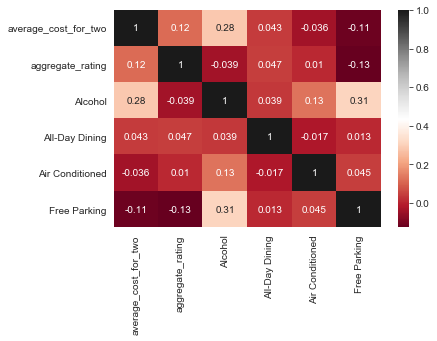

In [14]:
df_sc['Air Conditioned'] = [1 if x.find("Air Conditioned")>0 else 0 for x in df_sc['highlights']] 
df_sc['Lunch'] = [1 if x.find("Lunch")>0 else 0 for x in df_sc['highlights']] 
df_sc['Dinner'] = [1 if x.find("Dinner")>0 else 0 for x in df_sc['highlights']] 
df_sc['Breakfast'] = [1 if x.find("Dinner")>0 else 0 for x in df_sc['highlights']] 
df_sc['All-Day Dining'] = [1 if x.find("Dinner" or "Lunch" or "Breakfast")>0 else 0 for x in df_sc['highlights']] 
df_sc['Free Parking'] = [1 if x.find("Free Parking")>0 else 0 for x in df_sc['highlights']]
hm=sns.heatmap(df_sc[['average_cost_for_two','aggregate_rating','Alcohol','All-Day Dining','Air Conditioned','Free Parking']].corr(), annot = True, fmt='.2g',cmap= 'RdGy')
for item in hm.get_xticklabels():
    item.set_rotation(90)

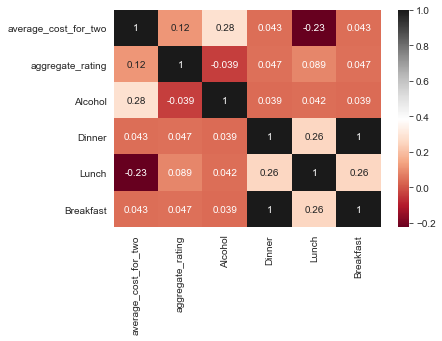

In [15]:
hm=sns.heatmap(df_sc[['average_cost_for_two','aggregate_rating','Alcohol','Dinner','Lunch','Breakfast']].corr(), annot = True, fmt='.2g',cmap= 'RdGy')
for item in hm.get_xticklabels():
    item.set_rotation(90)